In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

her2df = pd.read_csv("/kaggle/input/rnaseqher2/tologit.csv")
her2df.head()


/kaggle/input/rnaseqher2/tologit.csv


,Patient.ID,ERBB2,STARD3,PGAP3,C17orf37,ORMDL3,Diagnosis.Age,Fraction.Genome.Altered,IHC.HER2
0,TCGA-3C-AALI,11326.494743,508.404666,634.691081,1055.102632,1738.504187,50,0.7164,Positive
1,TCGA-3C-AALK,2019.833240,214.302047,296.389488,215.703814,387.111809,52,0.0764,Positive
2,TCGA-A1-A0SM,10710.882747,593.543307,494.068072,459.768268,1667.574052,77,0.1807,Positive
3,TCGA-A1-A0SN,8810.174300,699.582345,759.100428,1092.701299,2075.239408,50,0.5518,Positive
4,TCGA-A2-A04W,5840.213186,442.199723,575.460503,483.843717,2164.059885,50,0.1065,Positive


In [2]:
her2df = her2df.drop(columns = "Patient.ID")

In [3]:

her2df = pd.get_dummies(her2df)
her2df = her2df.drop(columns = "IHC.HER2_Negative")

# ok, should be ready now

In [4]:
her2df.head()
# Positive column = 1, positive IHC, 0 is negative

,ERBB2,STARD3,PGAP3,C17orf37,ORMDL3,Diagnosis.Age,Fraction.Genome.Altered,IHC.HER2_Positive
0,11326.494743,508.404666,634.691081,1055.102632,1738.504187,50,0.7164,1
1,2019.833240,214.302047,296.389488,215.703814,387.111809,52,0.0764,1
2,10710.882747,593.543307,494.068072,459.768268,1667.574052,77,0.1807,1
3,8810.174300,699.582345,759.100428,1092.701299,2075.239408,50,0.5518,1
4,5840.213186,442.199723,575.460503,483.843717,2164.059885,50,0.1065,1


In [5]:
# begin the scikit workflow

#specifying groups:
features = ['ERBB2','STARD3','PGAP3','C17orf37','ORMDL3','Diagnosis.Age','Fraction.Genome.Altered']
X = her2df[features]
y = her2df['IHC.HER2_Positive']

#specifying training/test sets:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)


In [6]:
# call
logit = LogisticRegression(max_iter = 1000) #didn't converge at 100, expecting POOR! results

# fit
logit.fit(X_train,y_train)

# predicty_pred=logreg.predict(X_test)
y_predicted = logit.predict(X_test)

# and i don't feel like getting into a confusion matrix this has gone on long enough!

In [7]:


print("accuracy score:",metrics.accuracy_score(y_test, y_predicted))
print("precision score:",metrics.precision_score(y_test, y_predicted))
print("recall score:",metrics.recall_score(y_test, y_predicted))

# OMG LOOK AT THAT IT WAS ACTUALLY PRETTY FLIPPING ACCURATE WHAT!!!!
# aspfmsdzkgz;dobszegp[kzdmrgionzdigunzsdrmgzdrg]
# that's craaazzyyyyyyyyyyyyyyyyy man after all that flipping analysis
# recall is HORRIBLE THO LLOLOLOL
# or maybe not, I guess we'll actually have to do a prediction matrix to see how
# stuff turned out:

accuracy score: 0.8981481481481481
precision score: 0.9565217391304348
recall score: 0.5116279069767442


In [8]:
# mostly copying this part of the code
CONFUSIONmx = metrics.confusion_matrix(y_test, y_predicted)

CONFUSIONmx 
# true on y, predicted on x axes

array([[172,   1],
       [ 21,  22]])

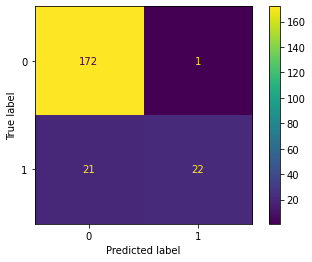

In [9]:
# from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

#Saving that plot so I can display in the RMD:

disp = ConfusionMatrixDisplay(CONFUSIONmx) #display_labels=clf.classes_)
disp.plot()

#>>> disp.plot()
#<...>
#>>> plt.show()

Ok... so it likes to say no, and for that it's very good, but for actually qualifying that you're positive, it is awful. No better than a monkey. So. 

For help because confusion matrices are confusing to me too: the top left and bottom right are the correct positives and correct negatives; bottom left is it predicted negative but it was actually postive, etc.

SO!!

That's pretty much what we saw with the density curve(s). One can easily say no, but not yes.
Rip.

"Go not to the Elves for counsel, for they will say both no and yes."
- Frodo Baggins